# Plotting workspace comparing the effect of consensus/non-consensus in estimation and motion for our distributed algorithm.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from matplotlib import style
from matplotlib.lines import Line2D

import pickle as pkl


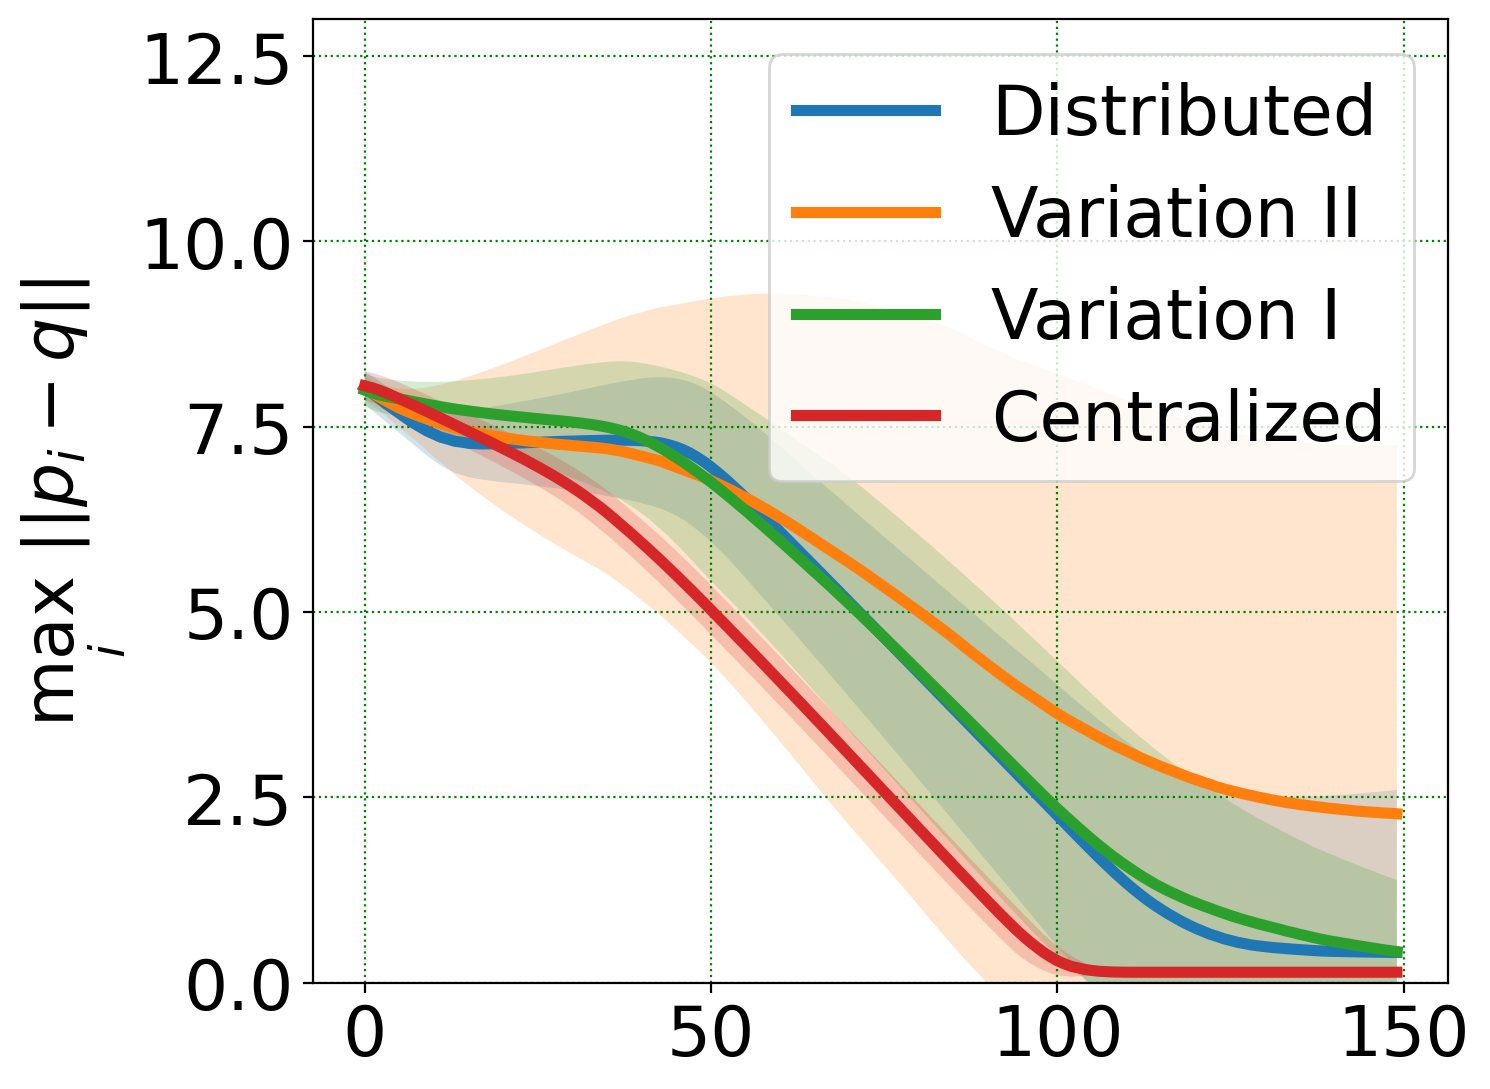

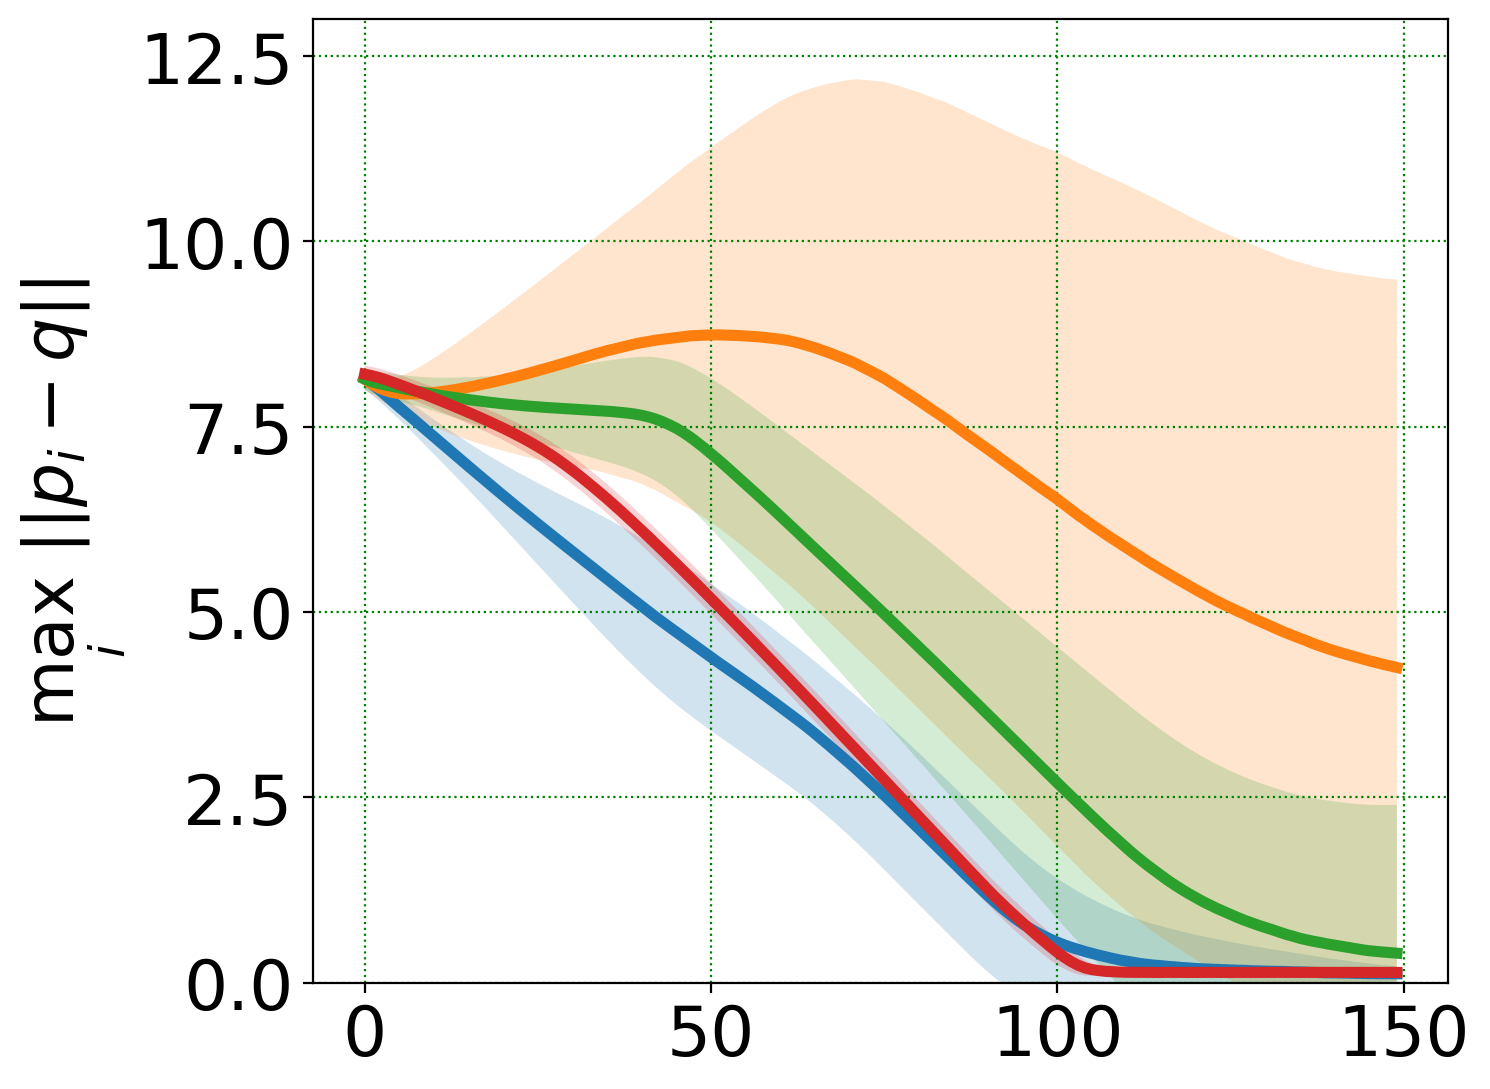

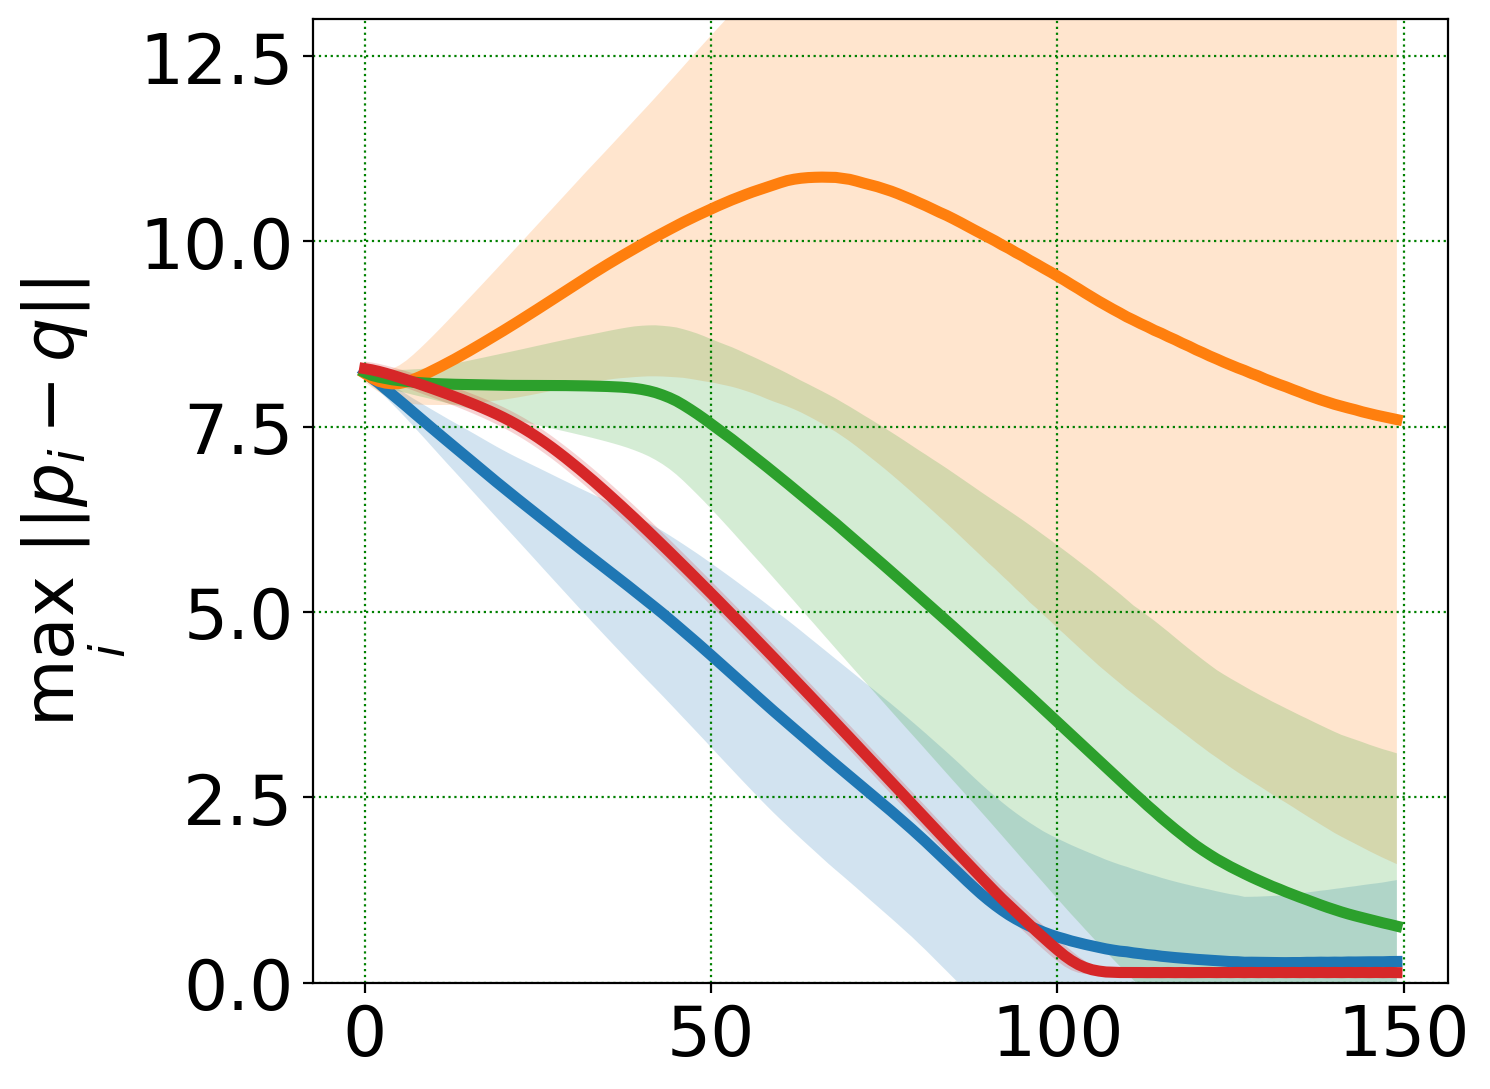

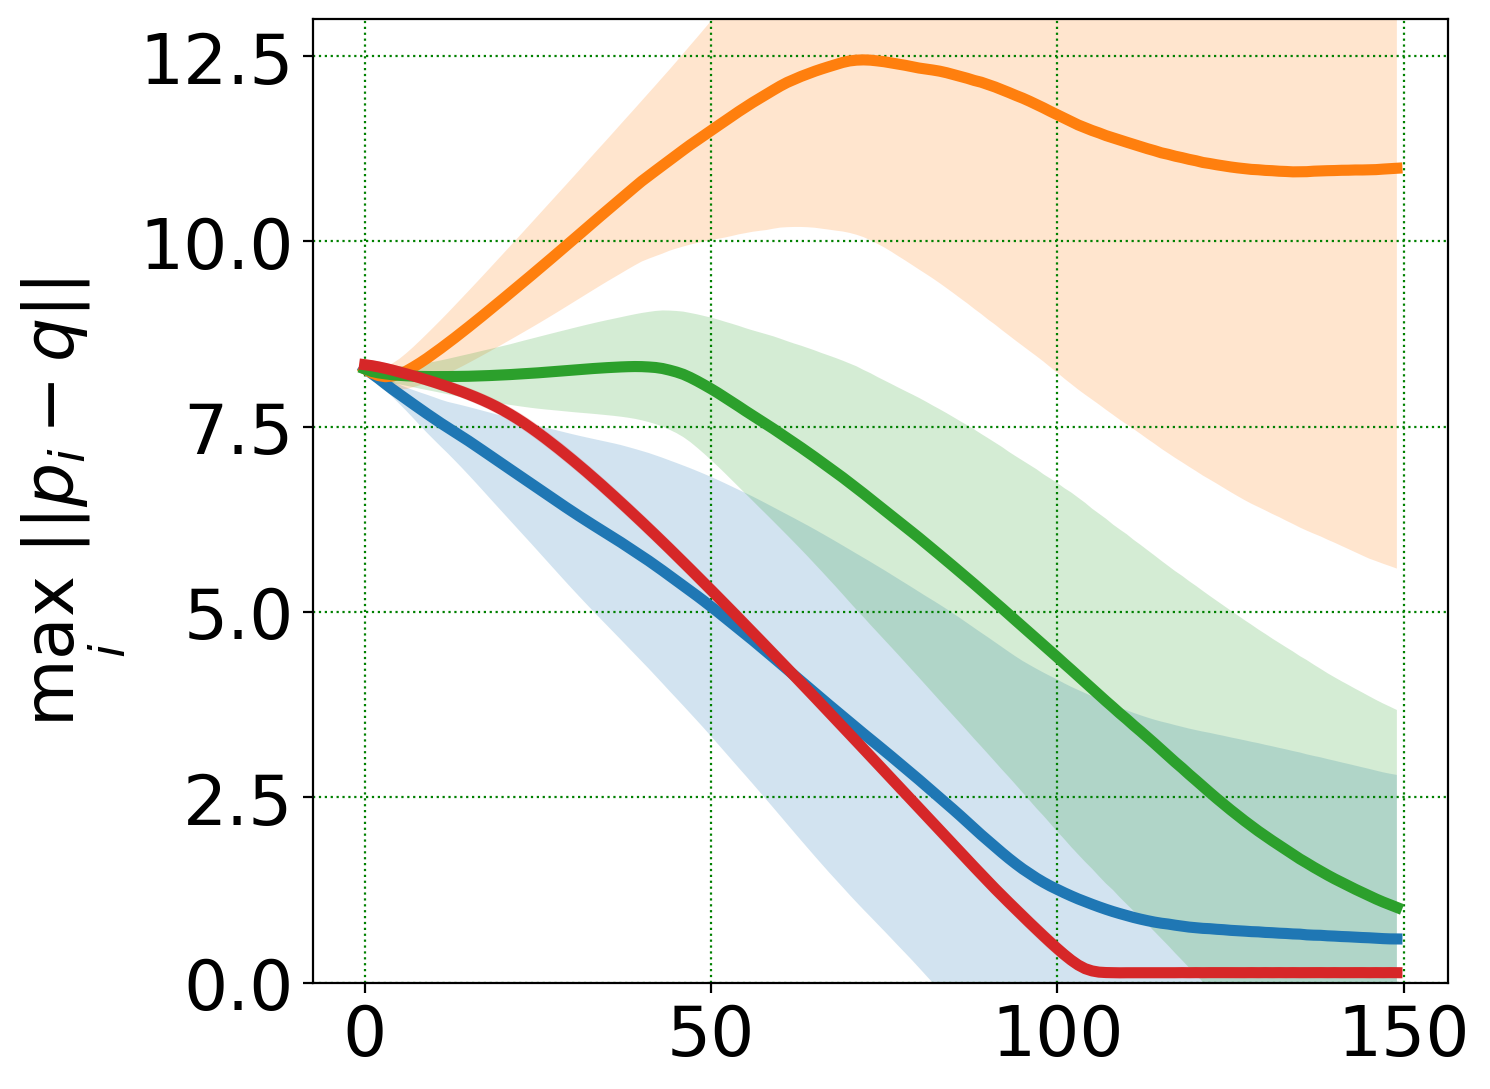

In [5]:
label_map = {'Coord.+Consensus Est.':'Distributed',
          'No Coord.+Consensus Est.':'Variation I',
           'No Coord.+Local Est.':'Variation II',
             'centralized':'Centralized'
          }
'''Plotting'''  
# for N_sen in [4,5,6,10,20,40]:


plt.rcParams['font.size'] = '25'

for N_sen in [4,10,20,40]:
  
# for N_sen in [10]:
    
    
    with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
        central_data = pkl.load(file)
    
    
    with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(N_sen),'rb') as file:
        data = pkl.load(file)    
    
    
    data={**data,**central_data}
    
    q = np.array([6,6])
    
    fig0,axis0 = plt.subplots(dpi=200,figsize=(8,6))
    # fig1,axis1 = plt.subplots(dpi=200,figsize =(8,4) )
    
    axes = [axis0]
  
    for name,d in data.items():
        ps = np.array(d['p'])
        qhat = np.array(d['qhat'])
         # qhat.shape=ps.shape=(N_trails,N_iter,space_dim)
        dist = np.linalg.norm(ps-q,axis=-1)
        # dist.shape = (N_trails,N_iter,N_sen)
        # print(qhat.shape,dist.shape)
        
        # if len(qhat.shape)>3:
        dist=np.max(dist,axis=-1)
        
        # print(dist.shape)
        

        ave_median_dist = np.mean(dist,axis=0)
        std_median_dist = np.std(dist,axis=0)
        N_iter=len(ave_median_dist)

        x = np.arange(N_iter)
        axes[0].plot(x,ave_median_dist,label= label_map[name],lw=4)
        axes[0].fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,alpha=0.2)
        # axes[0].errorbar(x,ave_median_dist,yerr=std_median_dist,label= label_map[name],errorevery=10)
        axes[0].set_ylabel(r'$\max_{i}~ ||p_i-q||$',fontsize=25)
        if N_sen == 4:
            axes[0].legend()
        axes[0].set_ylim((0,13))
        axes[0].grid(True,ls='dotted',color='g')
        axes[0].tick_params(axis='both', which='major', labelsize=25)
        axes[0].tick_params(axis='both', which='minor', labelsize=25)

        
      
    # fig.suptitle('{} Sensors'.format(N_sen))
        fig0.tight_layout()
        
        fig0.savefig('../Figures/Farthest Sensor/FarthestDistCompare_{}Sensor.png'.format(N_sen))
        